<a href="https://colab.research.google.com/github/gpatyal/INSE6220GAURAVPATYAL/blob/main/INSE6220GauravPatyal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [7]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


Original Data set Link:- https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset

In [10]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/gpatyal/GauravINSE6220/main/New%20Final%20Dataset.csv')
df.head(294)

,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,class
0,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...
289,0.9151,0.9862,0.7310,0.7206,2.4800,0.6337,1
290,0.9339,0.9567,0.5163,0.6530,2.7974,0.5871,1
291,0.9358,0.9872,0.6240,0.6564,2.8360,0.5892,1
292,0.8848,0.9898,0.5933,0.7635,2.1465,0.6792,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Eccentricity   294 non-null    float64
 1   Solidity       294 non-null    float64
 2   Extent         294 non-null    float64
 3   Roundness      294 non-null    float64
 4   Aspect_Ration  294 non-null    float64
 5   Compactness    294 non-null    float64
 6   class          294 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 16.2 KB


In [12]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [13]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


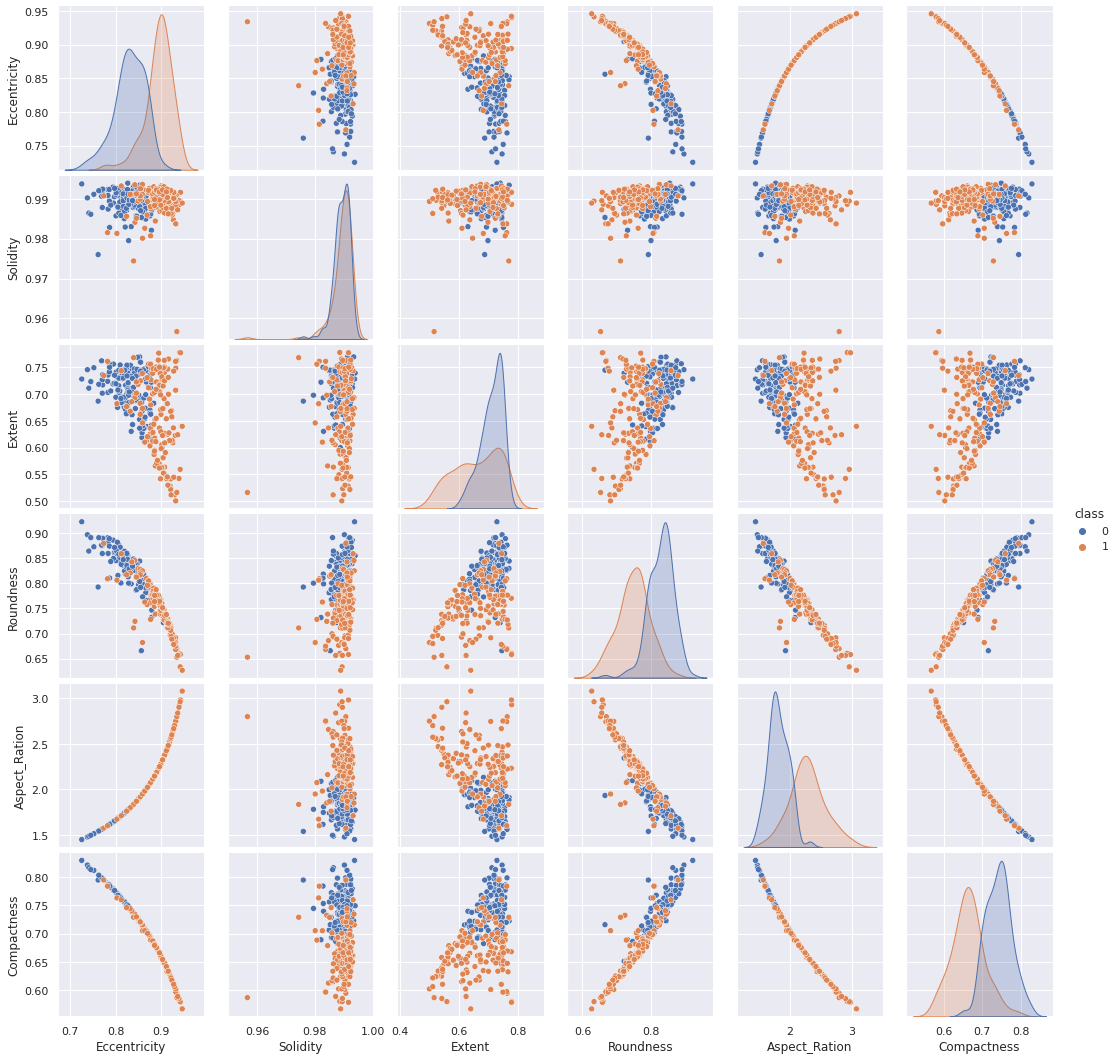

In [15]:
sns.pairplot(df, hue='class')
plt.show()

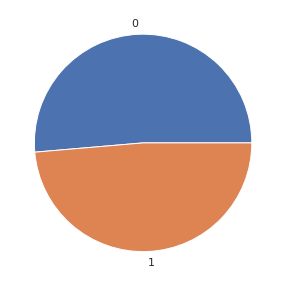

In [16]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [17]:
X = df.drop(columns=['class'])
X.head(10)

,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
5,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522
6,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790
7,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067
8,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152
9,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394


In [18]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Eccentricity,294.0,0.860904,0.045200,0.7252,0.827125,0.86505,0.898200,0.9457
Solidity,294.0,0.989299,0.003419,0.9567,0.988025,0.98990,0.991400,0.9939
Extent,294.0,0.685719,0.064505,0.5005,0.644125,0.70310,0.738600,0.7775
Roundness,294.0,0.789643,0.058027,0.6270,0.750050,0.79575,0.835850,0.9221
Aspect_Ration,294.0,2.045560,0.329175,1.4524,1.779150,1.99340,2.275200,3.0759
Compactness,294.0,0.703733,0.054569,0.5673,0.662025,0.70565,0.746975,0.8289


In [19]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-2.732627,0.263992,0.925233,1.841215,-1.718305,2.147141
1,-0.740286,0.674180,0.456257,0.938366,-0.804773,0.825451
2,0.310182,-1.054471,0.842929,-0.383970,0.059461,-0.198859
3,-1.077144,0.263992,0.836718,1.017776,-1.007138,1.076939
4,-0.935309,-1.259566,-0.163350,0.762285,-0.925888,0.953948
5,-0.873256,0.058897,0.477998,1.007418,-0.888762,0.889699
6,-1.487137,1.055069,0.512162,1.658228,-1.221066,1.381662
7,0.081916,0.029598,-0.188197,0.104570,-0.168161,0.054465
8,-0.079865,-0.204795,-1.039187,0.057960,-0.314229,0.210498
9,-0.560775,0.674180,0.909704,0.884852,-0.686093,0.654732


In [20]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Eccentricity,294.0,2.244520e-15,1.001705,-3.007433,-0.748596,0.091888,0.826551,1.879234
Solidity,294.0,5.453047e-14,1.001705,-9.551233,-0.373266,0.176094,0.615582,1.348061
Extent,294.0,-9.818299e-16,1.001705,-2.876268,-0.645914,0.269909,0.821189,1.425267
Roundness,294.0,-6.437594e-16,1.001705,-2.807677,-0.683481,0.105433,0.797674,2.286597
Aspect_Ration,294.0,-1.252352e-15,1.001705,-1.805033,-0.810707,-0.158728,0.698812,3.135405
Compactness,294.0,4.885784e-16,1.001705,-2.504474,-0.765626,0.035190,0.793785,2.297666


In [21]:
observations = list(df.index)
variables = list(df.columns)

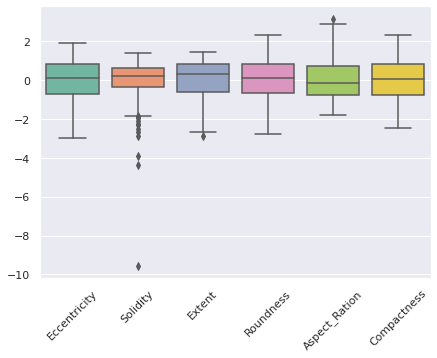

In [22]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

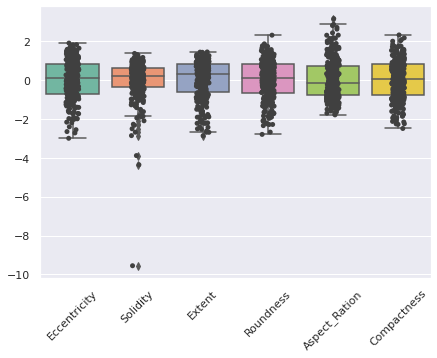

In [23]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

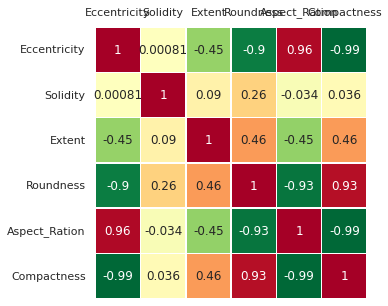

In [24]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

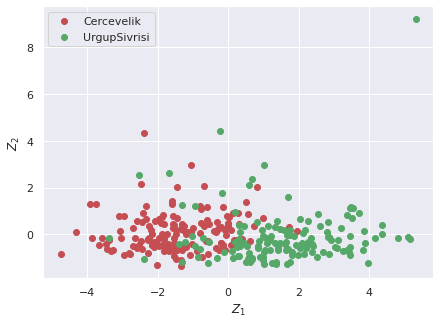

In [25]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Cercevelik)->0,  2(UrgupSivrisi)->1, 
idx_Cercevelik = np.where(y == 0)
idx_UrgupSivrisi = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_Cercevelik,0], Z[idx_Cercevelik,1], c='r', label='Cercevelik')
plt.scatter(Z[idx_UrgupSivrisi,0], Z[idx_UrgupSivrisi,1], c='g', label='UrgupSivrisi')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

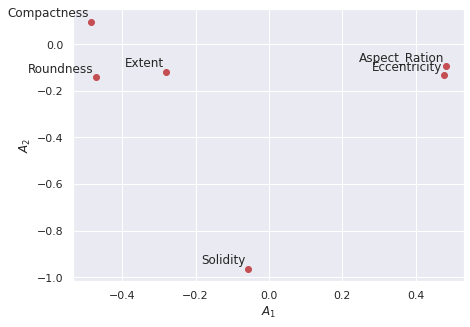

In [27]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [28]:
A

array([[ 4.76521273e-01, -1.33717128e-01,  1.27169895e-01,
        -6.07639838e-01,  4.87140009e-01, -3.63790411e-01],
       [-5.81573937e-02, -9.64151579e-01, -1.37052551e-01,
         2.01707808e-01,  8.64635286e-02,  9.16882634e-03],
       [-2.79667846e-01, -1.17533876e-01,  9.52861252e-01,
         4.93315375e-03, -4.05077707e-05,  1.66734965e-03],
       [-4.72065967e-01, -1.42817722e-01, -1.52418646e-01,
        -7.35116122e-01, -4.38966767e-01,  2.09246934e-02],
       [ 4.82017804e-01, -9.51692914e-02,  1.29932054e-01,
         1.05746787e-01, -7.30737646e-01, -4.43350215e-01],
       [-4.85946139e-01,  9.62452868e-02, -1.30330609e-01,
         1.96176851e-01,  1.68965491e-01, -8.18884872e-01]])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


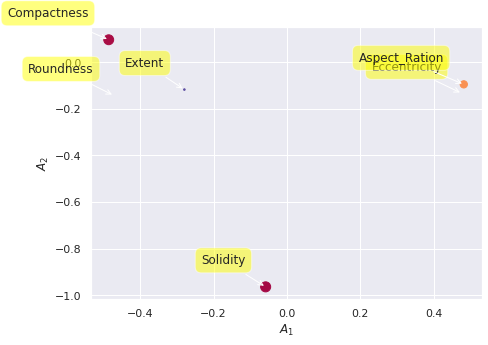

In [29]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

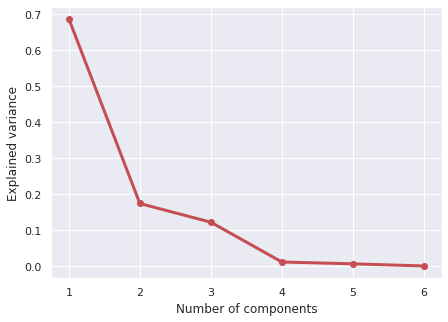

In [30]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [31]:
for i in x:
  print(Lambda[i-1])

4.138970139652791
1.0463647280691695
0.7326777812534868
0.06626526590863153
0.035732976552780855
0.0004669242628016357


Text(0, 0.5, 'Cumulative explained variance')

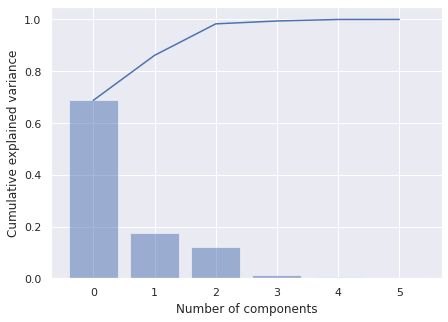

In [32]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

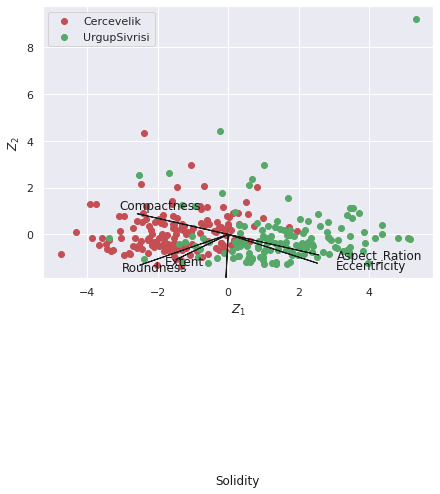

In [33]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Cercevelik,0], Z[idx_Cercevelik,1], c='r', label='Cercevelik')
plt.scatter(Z[idx_UrgupSivrisi,0], Z[idx_UrgupSivrisi,1], c='g', label='UrgupSivrisi')
plt.legend(loc='upper left')

In [34]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9454e4b813fe83e98a9d4f1345e47f6fad3b08503aa67c95852358cc655fd9e5
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [35]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [36]:
out['PC']

,PC1,PC2,PC3
0,-4.317089,0.109349,-0.285806
1,-1.751581,-0.582629,-0.106962
2,0.279948,0.906161,1.079326
3,-2.251888,-0.154695,0.197769
4,-1.596468,1.429740,-0.462784
...,...,...,...
289,2.253104,0.552847,1.468193
290,5.318893,9.214824,-0.056302
291,4.361691,0.380871,0.319245
292,1.225139,-0.051789,-1.152905


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f714c682b90>)

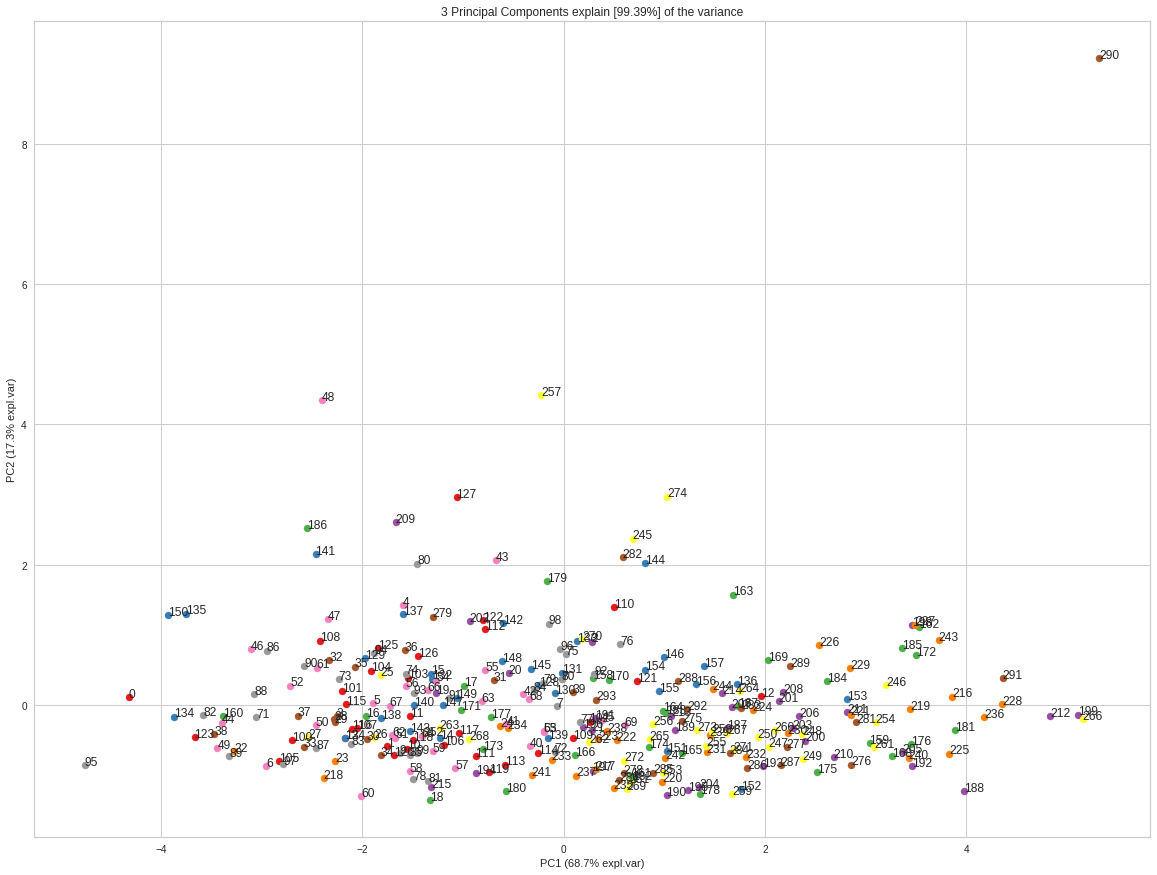

In [48]:
model.scatter(label=True, legend=False)

In [49]:
A = out['loadings'].T

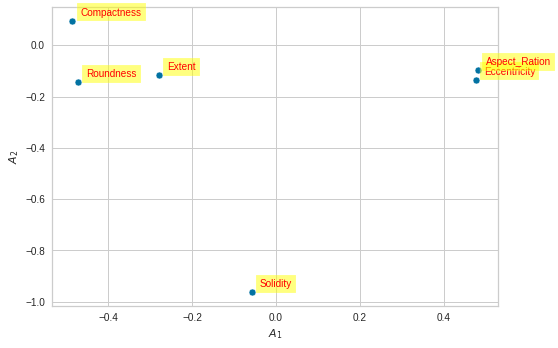

In [50]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

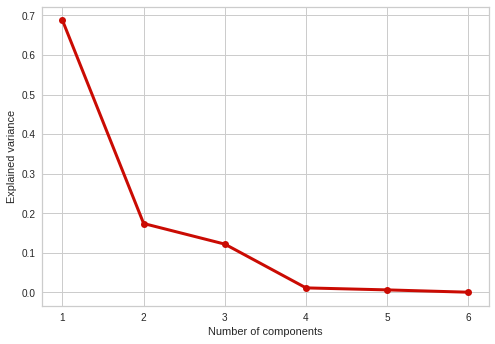

In [51]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

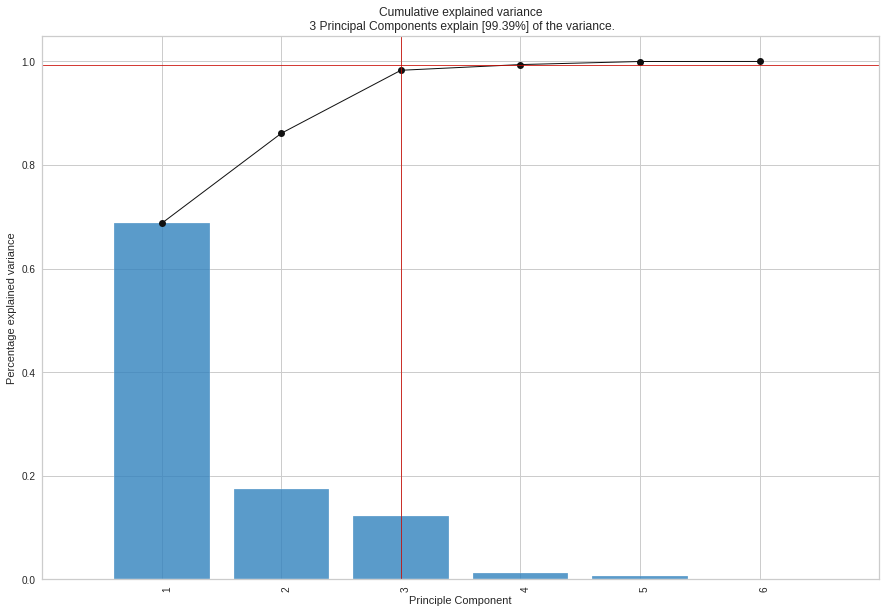

<Figure size 576x396 with 0 Axes>

In [52]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.


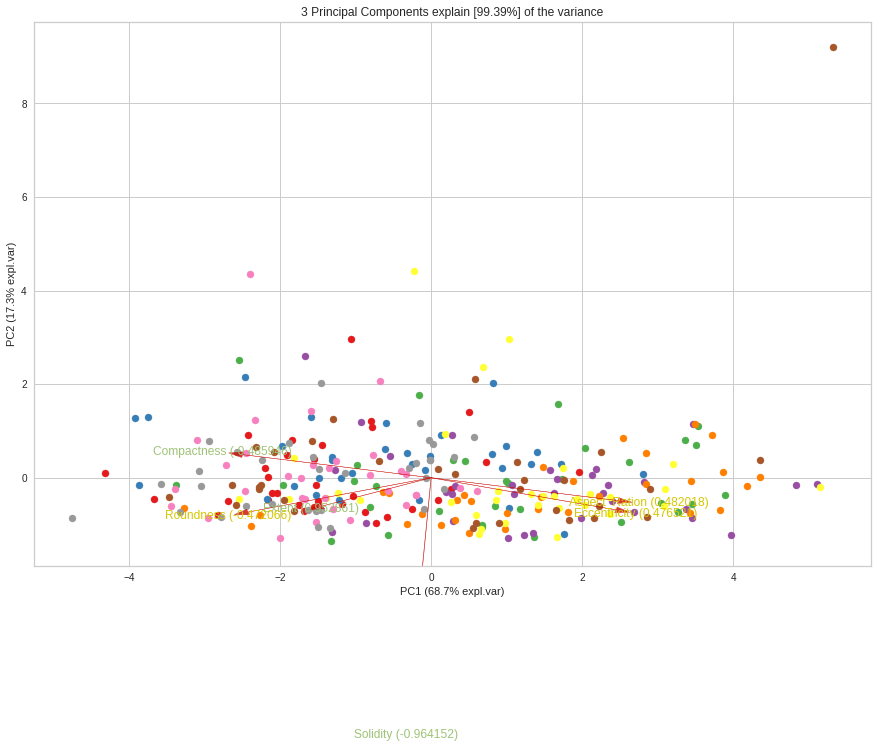

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f714d8b57d0>)

In [53]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


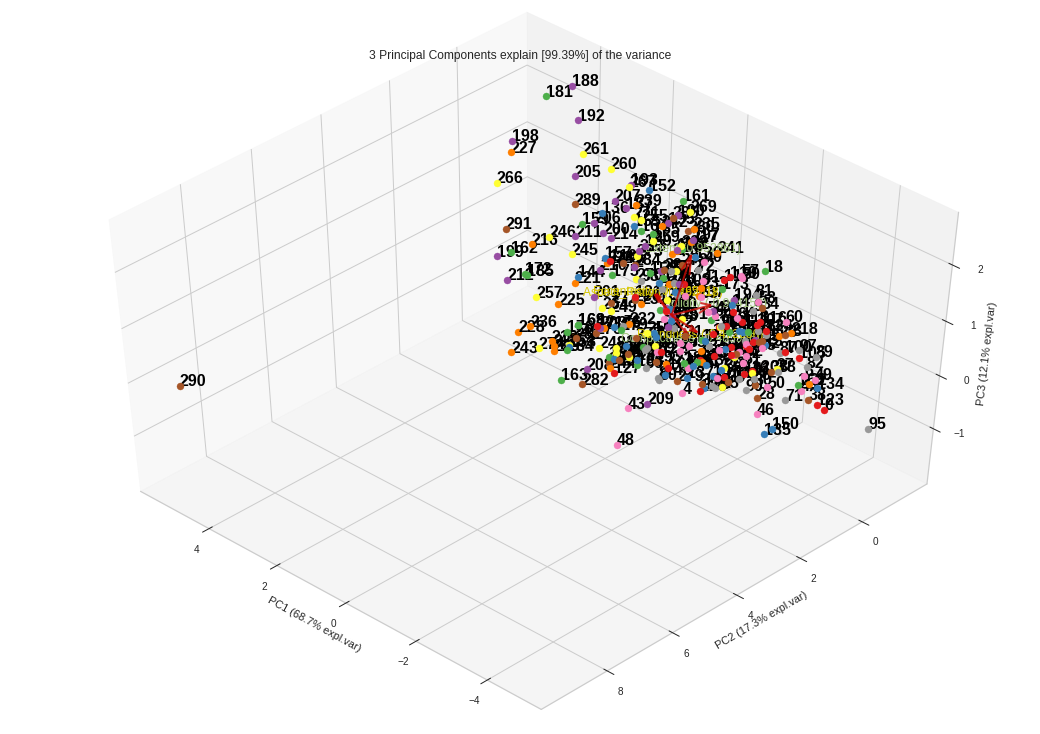

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f714c33c310>)

In [54]:
model.biplot3d(legend=False)

In [55]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [56]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (265, 7)
Unseen Data For Predictions: (29, 7)


In [57]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(265, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [58]:
#show the best model and their statistics
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8857,0.9390,0.8264,0.9296,0.8682,0.7682,0.7799,0.461
ridge,Ridge Classifier,0.8751,0.0000,0.8014,0.9290,0.8480,0.7446,0.7619,0.013
qda,Quadratic Discriminant Analysis,0.8749,0.9315,0.8250,0.9178,0.8556,0.7452,0.7621,0.014
lda,Linear Discriminant Analysis,0.8749,0.9386,0.8264,0.9164,0.8620,0.7466,0.7580,0.014
lightgbm,Light Gradient Boosting Machine,0.8743,0.9186,0.8486,0.8890,0.8620,0.7459,0.7543,0.028
et,Extra Trees Classifier,0.8696,0.9568,0.8264,0.8952,0.8542,0.7361,0.7437,0.443
nb,Naive Bayes,0.8646,0.9295,0.8611,0.8752,0.8606,0.7273,0.7374,0.014
knn,K Neighbors Classifier,0.8640,0.9232,0.7681,0.9344,0.8311,0.7223,0.7422,0.117
lr,Logistic Regression,0.8594,0.9295,0.8139,0.8899,0.8402,0.7146,0.7279,0.020
dt,Decision Tree Classifier,0.8579,0.8568,0.8625,0.8558,0.8545,0.7145,0.7215,0.015


In [59]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [60]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8421,0.8444,0.8889,0.8000,0.8421,0.6851,0.6889
1,0.8421,0.8389,0.7778,0.8750,0.8235,0.6816,0.6854
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9474,0.9500,1.0000,0.9000,0.9474,0.8950,0.9000
4,0.9474,0.9500,1.0000,0.9000,0.9474,0.8950,0.9000
5,0.8889,0.8750,0.7500,1.0000,0.8571,0.7692,0.7906
6,0.8889,0.8875,0.8750,0.8750,0.8750,0.7750,0.7750
7,0.7222,0.7222,0.8889,0.6667,0.7619,0.4444,0.4714
8,0.8333,0.8333,0.7778,0.8750,0.8235,0.6667,0.6708
9,0.6667,0.6667,0.6667,0.6667,0.6667,0.3333,0.3333


In [61]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [62]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8947,1.0000,1.0000,0.8182,0.9000,0.7912,0.8090
1,0.7895,0.8111,0.6667,0.8571,0.7500,0.5730,0.5866
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8947,0.9000,1.0000,0.8182,0.9000,0.7912,0.8090
5,0.8889,0.8375,0.7500,1.0000,0.8571,0.7692,0.7906
6,0.9444,0.9188,0.8750,1.0000,0.9333,0.8861,0.8919
7,0.8889,0.8889,0.8889,0.8889,0.8889,0.7778,0.7778
8,0.9444,0.9383,0.8889,1.0000,0.9412,0.8889,0.8944
9,0.6667,0.7531,0.5556,0.7143,0.6250,0.3333,0.3419


In [63]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [65]:
!pip install statsmodels --upgrade

In [66]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [67]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7368,0.8444,0.5556,0.8333,0.6667,0.4633,0.4893
2,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
3,0.8947,0.9444,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.8947,0.9333,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.7778,0.7938,0.5000,1.0000,0.6667,0.5263,0.5976
6,0.8333,0.9750,0.6250,1.0000,0.7692,0.6494,0.6934
7,0.9444,0.9877,0.8889,1.0000,0.9412,0.8889,0.8944
8,0.8889,0.9321,0.7778,1.0000,0.8750,0.7778,0.7977
9,0.7222,0.8210,0.5556,0.8333,0.6667,0.4444,0.4714


In [68]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9667,0.8889,1.0000,0.9412,0.8939,0.8989
1,0.7895,0.8889,0.5556,1.0000,0.7143,0.5682,0.6299
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9474,1.0000,0.8889,1.0000,0.9412,0.8939,0.8989
4,0.8947,0.8944,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.7778,0.9750,0.5000,1.0000,0.6667,0.5263,0.5976
6,0.8333,0.9000,0.6250,1.0000,0.7692,0.6494,0.6934
7,0.9444,1.0000,0.8889,1.0000,0.9412,0.8889,0.8944
8,0.8889,0.8951,0.7778,1.0000,0.8750,0.7778,0.7977
9,0.7222,0.7531,0.6667,0.7500,0.7059,0.4444,0.4472


In [69]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9667,0.8889,1.0000,0.9412,0.8939,0.8989
1,0.6842,0.8889,0.5556,0.7143,0.6250,0.3596,0.3680
2,0.8947,1.0000,1.0000,0.8182,0.9000,0.7912,0.8090
3,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
4,0.8421,0.9222,0.8889,0.8000,0.8421,0.6851,0.6889
5,0.8333,0.9750,0.6250,1.0000,0.7692,0.6494,0.6934
6,0.8333,0.9000,0.6250,1.0000,0.7692,0.6494,0.6934
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9444,0.9012,0.8889,1.0000,0.9412,0.8889,0.8944
9,0.6667,0.7407,0.6667,0.6667,0.6667,0.3333,0.3333


In [71]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9667,0.8889,1.0000,0.9412,0.8939,0.8989
1,0.6842,0.8889,0.5556,0.7143,0.6250,0.3596,0.3680
2,0.8947,1.0000,1.0000,0.8182,0.9000,0.7912,0.8090
3,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
4,0.8421,0.9222,0.8889,0.8000,0.8421,0.6851,0.6889
5,0.8333,0.9750,0.6250,1.0000,0.7692,0.6494,0.6934
6,0.8333,0.9000,0.6250,1.0000,0.7692,0.6494,0.6934
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9444,0.9012,0.8889,1.0000,0.9412,0.8889,0.8944
9,0.6667,0.7407,0.6667,0.6667,0.6667,0.3333,0.3333


In [72]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [74]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7895,0.9000,0.6667,0.8571,0.7500,0.5730,0.5866
2,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
3,0.9474,0.9889,1.0000,0.9000,0.9474,0.8950,0.9000
4,0.8947,0.9222,0.8889,0.8889,0.8889,0.7889,0.7889
5,0.8333,0.9312,0.6250,1.0000,0.7692,0.6494,0.6934
6,0.8889,0.9562,0.7500,1.0000,0.8571,0.7692,0.7906
7,0.9444,0.9259,0.8889,1.0000,0.9412,0.8889,0.8944
8,0.8889,0.9383,0.7778,1.0000,0.8750,0.7778,0.7977
9,0.7222,0.8272,0.6667,0.7500,0.7059,0.4444,0.4472


In [75]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7368,0.9000,0.5556,0.8333,0.6667,0.4633,0.4893
2,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
3,0.8947,0.9889,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.9474,0.9667,1.0000,0.9000,0.9474,0.8950,0.9000
5,0.7778,0.8875,0.5000,1.0000,0.6667,0.5263,0.5976
6,0.8889,0.9500,0.7500,1.0000,0.8571,0.7692,0.7906
7,0.9444,0.9506,0.8889,1.0000,0.9412,0.8889,0.8944
8,0.8889,0.9383,0.7778,1.0000,0.8750,0.7778,0.7977
9,0.7222,0.8889,0.6667,0.7500,0.7059,0.4444,0.4472


In [76]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [77]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7368,0.9000,0.5556,0.8333,0.6667,0.4633,0.4893
2,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
3,0.8947,0.9889,0.8889,0.8889,0.8889,0.7889,0.7889
4,0.9474,0.9667,1.0000,0.9000,0.9474,0.8950,0.9000
5,0.7778,0.8875,0.5000,1.0000,0.6667,0.5263,0.5976
6,0.8889,0.9500,0.7500,1.0000,0.8571,0.7692,0.7906
7,0.9444,0.9506,0.8889,1.0000,0.9412,0.8889,0.8944
8,0.8889,0.9383,0.7778,1.0000,0.8750,0.7778,0.7977
9,0.7222,0.8889,0.6667,0.7500,0.7059,0.4444,0.4472


In [78]:
tuned_best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [79]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [80]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(265, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [81]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8643,0.9317,0.8486,0.8816,0.8558,0.7257,0.7369,0.016
ridge,Ridge Classifier,0.8591,0.0000,0.8139,0.8952,0.8409,0.7138,0.7291,0.013
lda,Linear Discriminant Analysis,0.8591,0.9328,0.8139,0.8952,0.8409,0.7138,0.7291,0.014
knn,K Neighbors Classifier,0.8585,0.9230,0.8139,0.8975,0.8411,0.7129,0.7288,0.113
nb,Naive Bayes,0.8538,0.9227,0.8375,0.8827,0.8467,0.7057,0.7230,0.013
rf,Random Forest Classifier,0.8538,0.9304,0.8028,0.8899,0.8343,0.7035,0.7174,0.464
qda,Quadratic Discriminant Analysis,0.8535,0.9275,0.8028,0.9052,0.8330,0.7030,0.7258,0.013
gbc,Gradient Boosting Classifier,0.8482,0.9081,0.8125,0.8787,0.8282,0.6919,0.7112,0.072
lightgbm,Light Gradient Boosting Machine,0.8482,0.9265,0.8139,0.8833,0.8322,0.6928,0.7137,0.027
ada,Ada Boost Classifier,0.8430,0.9038,0.8264,0.8576,0.8343,0.6837,0.6933,0.092


In [82]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9667,0.8889,1.0000,0.9412,0.8939,0.8989
1,0.7895,0.9111,0.6667,0.8571,0.7500,0.5730,0.5866
2,0.8947,1.0000,1.0000,0.8182,0.9000,0.7912,0.8090
3,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
4,0.8421,0.9222,0.8889,0.8000,0.8421,0.6851,0.6889
5,0.8333,0.9750,0.6250,1.0000,0.7692,0.6494,0.6934
6,0.8889,0.9250,0.7500,1.0000,0.8571,0.7692,0.7906
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9444,0.9012,0.8889,1.0000,0.9412,0.8889,0.8944
9,0.6111,0.7407,0.7778,0.5833,0.6667,0.2222,0.2357


In [84]:
tuned_best_model_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [87]:
!pip install shap

In [88]:
import shap

In [89]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9778,0.8889,1.0000,0.9412,0.8939,0.8989
1,0.6842,0.8889,0.5556,0.7143,0.6250,0.3596,0.3680
2,0.8947,0.9778,1.0000,0.8182,0.9000,0.7912,0.8090
3,0.9474,1.0000,1.0000,0.9000,0.9474,0.8950,0.9000
4,0.8421,0.9500,0.8889,0.8000,0.8421,0.6851,0.6889
5,0.8333,0.8938,0.6250,1.0000,0.7692,0.6494,0.6934
6,0.8333,0.9188,0.6250,1.0000,0.7692,0.6494,0.6934
7,0.9444,1.0000,0.8889,1.0000,0.9412,0.8889,0.8944
8,0.9444,0.9568,0.8889,1.0000,0.9412,0.8889,0.8944
9,0.6667,0.7407,0.6667,0.6667,0.6667,0.3333,0.3333


In [90]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9474,0.9778,0.8889,1.0000,0.9412,0.8939,0.8989
1,0.7895,0.8111,0.6667,0.8571,0.7500,0.5730,0.5866
2,0.8947,0.9667,1.0000,0.8182,0.9000,0.7912,0.8090
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8421,0.8667,0.8889,0.8000,0.8421,0.6851,0.6889
5,0.8333,0.9000,0.6250,1.0000,0.7692,0.6494,0.6934
6,0.8889,0.9125,0.7500,1.0000,0.8571,0.7692,0.7906
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9444,0.9383,0.8889,1.0000,0.9412,0.8889,0.8944
9,0.6111,0.6420,0.7778,0.5833,0.6667,0.2222,0.2357


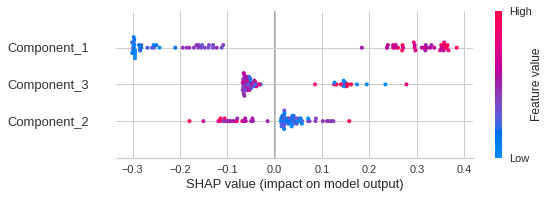

In [91]:
interpret_model(tuned_rf_pca, plot='summary')

In [92]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [93]:
interpret_model(tuned_rf_pca, plot='reason')